# Mads Notebooks: Contamination

Import Mads in Julia

In [1]:
import Mads

Change the working directory

In [2]:
cd(joinpath(Pkg.dir("Mads"), "examples", "contamination"))

Load Mads input file

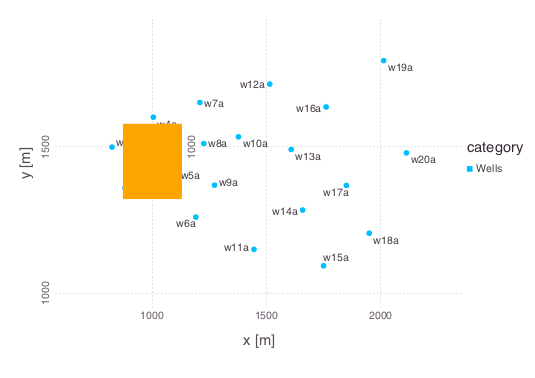

In [3]:
md = Mads.loadmadsfile("w01.mads") # load Mads input file into Mads Dictionary
Mads.plotmadsproblem(md, keyword="all_wells")

There are 20 monitoring wells.
Each well has 2 measurement ports: shallow (3 m below the water table labeled `a`) and deep (33 m below the water table labeled `b`).
Contaminant concentrations are observed for 50 years at each well.
The contaminant transport is solved using the `Anasol` package in Mads.

### Unknown model parameters

* Start time of contaminant release $t_0$
* End time of contaminant release $t_1$
* Advective pore velocity $v$

### Reduced model setup 

Analysis of the data from only 2 monitoring locations: `w13a` and `w20a`.

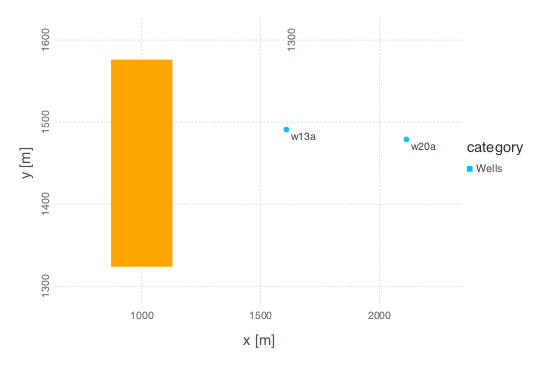

In [4]:
Mads.allwellsoff!(md) # turn off all wells
Mads.wellon!(md, "w13a") # use well w13a
Mads.wellon!(md, "w20a") # use well w20a
Mads.plotmadsproblem(md, keyword="w13a_w20a")

### Initial estimates

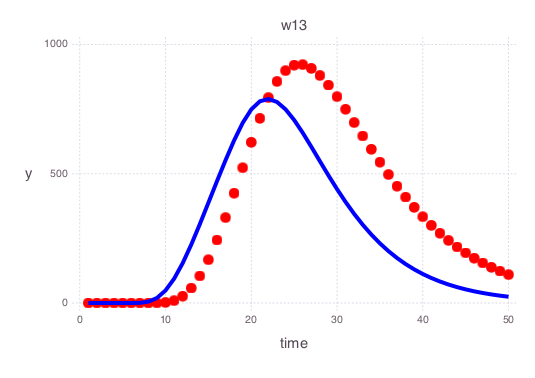

In [9]:
Mads.plotmatches(md, r"w13")

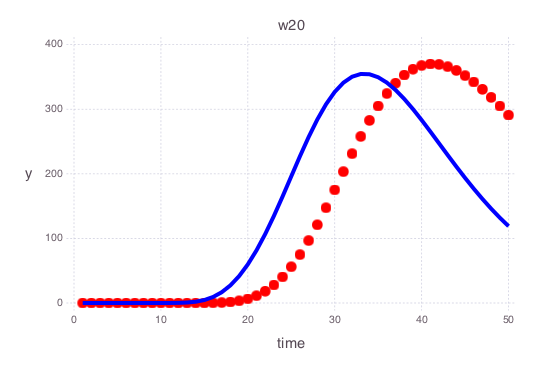

In [10]:
Mads.plotmatches(md, r"w20")

### Calibration

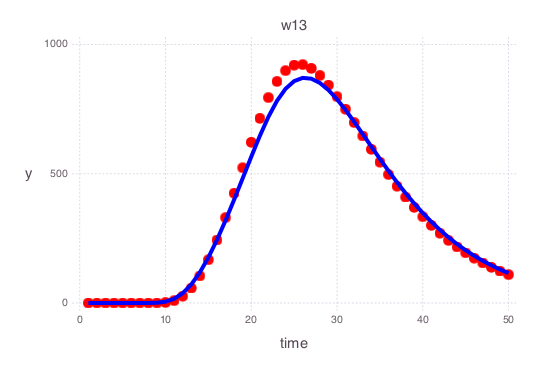

In [11]:
calib_param, calib_results = Mads.calibrate(md)
calib_predictions = Mads.forward(md, calib_param)
Mads.plotmatches(md, calib_predictions, r"w13")

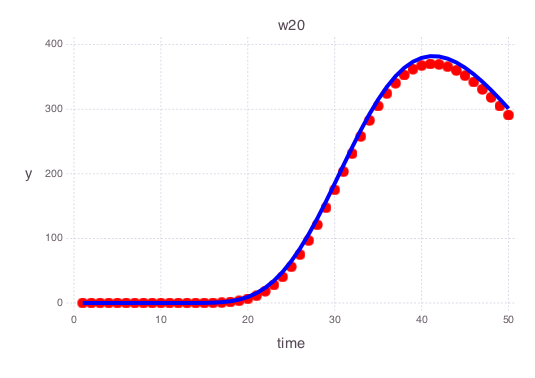

In [12]:
Mads.plotmatches(md, calib_predictions, r"w20")